# Wrangling the Roblox API Dump

In [222]:
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
import luadata
import os

pd.options.mode.chained_assignment = None  # default='warn'

In [223]:
api_version = req.get("http://setup.roblox.com/versionQTStudio").text
api = req.get(f"http://setup.roblox.com/{api_version}-API-Dump.json").json()

In [224]:
api_classes = pd.json_normalize(api['Classes'])
api_classes

,Members,MemoryCategory,Name,Superclass,Tags
0,"[{'Category': 'Behavior', 'MemberType': 'Prope...",Instances,Instance,<<<ROOT>>>,"[NotCreatable, NotBrowsable]"
1,"[{'Category': 'Transform', 'MemberType': 'Prop...",Instances,Accoutrement,Instance,NaN
2,"[{'Category': 'Data', 'MemberType': 'Property'...",Instances,Accessory,Accoutrement,NaN
3,[],Instances,Hat,Accoutrement,[Deprecated]
4,"[{'Category': 'State', 'MemberType': 'Property...",Instances,AdPortal,Instance,NaN
...,...,...,...,...,...
677,[],Instances,Visit,Instance,"[NotCreatable, Service, NotReplicated]"
678,"[{'Category': 'State', 'MemberType': 'Property...",Instances,VoiceChatInternal,Instance,"[NotCreatable, Service, NotBrowsable]"
679,"[{'Category': 'Behavior', 'MemberType': 'Prope...",Instances,VoiceChatService,Instance,"[NotCreatable, Service]"
680,"[{'Category': 'Behavior', 'MemberType': 'Prope...",PhysicsParts,WeldConstraint,Instance,NaN


In [225]:
api_classes['Tags'] = api_classes['Tags'].apply(lambda x: x if isinstance(x, list) else [])
api_classes

,Members,MemoryCategory,Name,Superclass,Tags
0,"[{'Category': 'Behavior', 'MemberType': 'Prope...",Instances,Instance,<<<ROOT>>>,"[NotCreatable, NotBrowsable]"
1,"[{'Category': 'Transform', 'MemberType': 'Prop...",Instances,Accoutrement,Instance,[]
2,"[{'Category': 'Data', 'MemberType': 'Property'...",Instances,Accessory,Accoutrement,[]
3,[],Instances,Hat,Accoutrement,[Deprecated]
4,"[{'Category': 'State', 'MemberType': 'Property...",Instances,AdPortal,Instance,[]
...,...,...,...,...,...
677,[],Instances,Visit,Instance,"[NotCreatable, Service, NotReplicated]"
678,"[{'Category': 'State', 'MemberType': 'Property...",Instances,VoiceChatInternal,Instance,"[NotCreatable, Service, NotBrowsable]"
679,"[{'Category': 'Behavior', 'MemberType': 'Prope...",Instances,VoiceChatService,Instance,"[NotCreatable, Service]"
680,"[{'Category': 'Behavior', 'MemberType': 'Prope...",PhysicsParts,WeldConstraint,Instance,[]


In [226]:
api_classes = api_classes[api_classes['Tags'].apply(lambda x: 'Deprecated' not in x)]
api_classes

,Members,MemoryCategory,Name,Superclass,Tags
0,"[{'Category': 'Behavior', 'MemberType': 'Prope...",Instances,Instance,<<<ROOT>>>,"[NotCreatable, NotBrowsable]"
1,"[{'Category': 'Transform', 'MemberType': 'Prop...",Instances,Accoutrement,Instance,[]
2,"[{'Category': 'Data', 'MemberType': 'Property'...",Instances,Accessory,Accoutrement,[]
4,"[{'Category': 'State', 'MemberType': 'Property...",Instances,AdPortal,Instance,[]
5,"[{'MemberType': 'Function', 'Name': 'GetAdTele...",Instances,AdService,Instance,"[NotCreatable, Service]"
...,...,...,...,...,...
677,[],Instances,Visit,Instance,"[NotCreatable, Service, NotReplicated]"
678,"[{'Category': 'State', 'MemberType': 'Property...",Instances,VoiceChatInternal,Instance,"[NotCreatable, Service, NotBrowsable]"
679,"[{'Category': 'Behavior', 'MemberType': 'Prope...",Instances,VoiceChatService,Instance,"[NotCreatable, Service]"
680,"[{'Category': 'Behavior', 'MemberType': 'Prope...",PhysicsParts,WeldConstraint,Instance,[]


In [227]:
api_classes['InstanceName'] = api_classes['Name']
api_members = pd.json_normalize(api_classes.explode('Members')['Members'])
api_members['InstanceName'] = api_classes.explode('Members')['InstanceName'].values
api_members

,Category,MemberType,Name,ThreadSafety,Security.Read,Security.Write,Serialization.CanLoad,Serialization.CanSave,ValueType.Category,ValueType.Name,Tags,Parameters,Security,ReturnType.Category,ReturnType.Name,InstanceName
0,Behavior,Property,Archivable,ReadSafe,None,None,False,False,Primitive,bool,NaN,NaN,NaN,NaN,NaN,Instance
1,Data,Property,ClassName,ReadSafe,None,None,False,False,Primitive,string,"[ReadOnly, NotReplicated]",NaN,NaN,NaN,NaN,Instance
2,Data,Property,DataCost,ReadSafe,LocalUserSecurity,LocalUserSecurity,False,False,Primitive,int,"[Hidden, ReadOnly, NotReplicated, Deprecated]",NaN,NaN,NaN,NaN,Instance
3,Data,Property,Name,ReadSafe,None,None,True,True,Primitive,string,NaN,NaN,NaN,NaN,NaN,Instance
4,Data,Property,Parent,ReadSafe,None,None,True,False,Class,Instance,[NotReplicated],NaN,NaN,NaN,NaN,Instance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,Data,Property,Connected,ReadSafe,None,None,False,True,Primitive,bool,"[ReadOnly, NotReplicated]",NaN,NaN,NaN,NaN,Wire
4816,Data,Property,SourceInstance,ReadSafe,None,None,True,True,Class,Instance,NaN,NaN,NaN,NaN,NaN,Wire
4817,Data,Property,SourceName,ReadSafe,None,None,True,True,Primitive,string,NaN,NaN,NaN,NaN,NaN,Wire
4818,Data,Property,TargetInstance,ReadSafe,None,None,True,True,Class,Instance,NaN,NaN,NaN,NaN,NaN,Wire


In [228]:
api_members['Tags'] = api_members['Tags'].apply(lambda x: x if isinstance(x, list) else [])
api_members = api_members[api_members['Tags'].apply(lambda x: 'Deprecated' not in x)]
api_members = api_members.dropna(subset=['MemberType'])
api_members

,Category,MemberType,Name,ThreadSafety,Security.Read,Security.Write,Serialization.CanLoad,Serialization.CanSave,ValueType.Category,ValueType.Name,Tags,Parameters,Security,ReturnType.Category,ReturnType.Name,InstanceName
0,Behavior,Property,Archivable,ReadSafe,None,None,False,False,Primitive,bool,[],NaN,NaN,NaN,NaN,Instance
1,Data,Property,ClassName,ReadSafe,None,None,False,False,Primitive,string,"[ReadOnly, NotReplicated]",NaN,NaN,NaN,NaN,Instance
3,Data,Property,Name,ReadSafe,None,None,True,True,Primitive,string,[],NaN,NaN,NaN,NaN,Instance
4,Data,Property,Parent,ReadSafe,None,None,True,False,Class,Instance,[NotReplicated],NaN,NaN,NaN,NaN,Instance
5,Data,Property,RobloxLocked,ReadSafe,PluginSecurity,PluginSecurity,False,False,Primitive,bool,[Hidden],NaN,NaN,NaN,NaN,Instance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,Data,Property,Connected,ReadSafe,None,None,False,True,Primitive,bool,"[ReadOnly, NotReplicated]",NaN,NaN,NaN,NaN,Wire
4816,Data,Property,SourceInstance,ReadSafe,None,None,True,True,Class,Instance,[],NaN,NaN,NaN,NaN,Wire
4817,Data,Property,SourceName,ReadSafe,None,None,True,True,Primitive,string,[],NaN,NaN,NaN,NaN,Wire
4818,Data,Property,TargetInstance,ReadSafe,None,None,True,True,Class,Instance,[],NaN,NaN,NaN,NaN,Wire


In [229]:
member_types = api_members['MemberType'].unique()
member_type_data_frames = {member_type: api_members[api_members['MemberType'] == member_type] for member_type in member_types}
for member_type in member_types:
    member_type_data_frames[member_type].drop(columns='MemberType', inplace=True)
member_types

array(['Property', 'Function', 'Event', 'Callback'], dtype=object)

In [230]:
for member_type in member_types:
    member_type_data_frames[member_type].dropna(axis=1, how='all', inplace=True)

In [231]:
member_type_data_frames['Property']

,Category,Name,ThreadSafety,Security.Read,Security.Write,Serialization.CanLoad,Serialization.CanSave,ValueType.Category,ValueType.Name,Tags,InstanceName
0,Behavior,Archivable,ReadSafe,None,None,False,False,Primitive,bool,[],Instance
1,Data,ClassName,ReadSafe,None,None,False,False,Primitive,string,"[ReadOnly, NotReplicated]",Instance
3,Data,Name,ReadSafe,None,None,True,True,Primitive,string,[],Instance
4,Data,Parent,ReadSafe,None,None,True,False,Class,Instance,[NotReplicated],Instance
5,Data,RobloxLocked,ReadSafe,PluginSecurity,PluginSecurity,False,False,Primitive,bool,[Hidden],Instance
...,...,...,...,...,...,...,...,...,...,...,...
4815,Data,Connected,ReadSafe,None,None,False,True,Primitive,bool,"[ReadOnly, NotReplicated]",Wire
4816,Data,SourceInstance,ReadSafe,None,None,True,True,Class,Instance,[],Wire
4817,Data,SourceName,ReadSafe,None,None,True,True,Primitive,string,[],Wire
4818,Data,TargetInstance,ReadSafe,None,None,True,True,Class,Instance,[],Wire


In [232]:
member_type_data_frames['Function']

,Name,ThreadSafety,Tags,Parameters,Security,ReturnType.Category,ReturnType.Name,InstanceName
9,AddTag,Unsafe,[],"[{'Name': 'tag', 'Type': {'Category': 'Primiti...",None,Primitive,null,Instance
10,ClearAllChildren,Unsafe,[],[],None,Primitive,null,Instance
11,Clone,Unsafe,[],[],None,Class,Instance,Instance
12,Destroy,Unsafe,[],[],None,Primitive,null,Instance
13,FindFirstAncestor,Safe,[],"[{'Name': 'name', 'Type': {'Category': 'Primit...",None,Class,Instance,Instance
...,...,...,...,...,...,...,...,...
4796,SubscribeBlock,Unsafe,[],"[{'Name': 'userId', 'Type': {'Category': 'Prim...",RobloxScriptSecurity,Primitive,bool,VoiceChatInternal
4799,SubscribeRetry,Unsafe,[],"[{'Name': 'userId', 'Type': {'Category': 'Prim...",RobloxScriptSecurity,Primitive,bool,VoiceChatInternal
4800,SubscribeUnblock,Unsafe,[],"[{'Name': 'userId', 'Type': {'Category': 'Prim...",RobloxScriptSecurity,Primitive,bool,VoiceChatInternal
4801,IsVoiceEnabledForUserIdAsync,Unsafe,[Yields],"[{'Name': 'userId', 'Type': {'Category': 'Prim...",None,Primitive,bool,VoiceChatInternal


In [233]:
member_type_data_frames['Event']

,Name,ThreadSafety,Tags,Parameters,Security,InstanceName
48,AncestryChanged,Unsafe,[],"[{'Name': 'child', 'Type': {'Category': 'Class...",None,Instance
49,AttributeChanged,Unsafe,[],"[{'Name': 'attribute', 'Type': {'Category': 'P...",None,Instance
50,Changed,Unsafe,[],"[{'Name': 'property', 'Type': {'Category': 'Pr...",None,Instance
51,ChildAdded,Unsafe,[],"[{'Name': 'child', 'Type': {'Category': 'Class...",None,Instance
52,ChildRemoved,Unsafe,[],"[{'Name': 'child', 'Type': {'Category': 'Class...",None,Instance
...,...,...,...,...,...,...
4730,Started,Unsafe,[],"[{'Name': 'cameraid', 'Type': {'Category': 'Pr...",RobloxScriptSecurity,VideoCaptureService
4731,Stopped,Unsafe,[],"[{'Name': 'cameraid', 'Type': {'Category': 'Pr...",RobloxScriptSecurity,VideoCaptureService
4757,PlaybackCompleted,Unsafe,[],"[{'Name': 'additionalLuaState', 'Type': {'Cate...",RobloxScriptSecurity,VirtualInputManager
4758,RecordingCompleted,Unsafe,[],"[{'Name': 'result', 'Type': {'Category': 'Prim...",RobloxScriptSecurity,VirtualInputManager


In [234]:
member_type_data_frames['Callback']

,Name,ThreadSafety,Tags,Parameters,Security,ReturnType.Category,ReturnType.Name,InstanceName
542,OnInvoke,Unsafe,[],"[{'Name': 'arguments', 'Type': {'Category': 'G...",None,Group,Tuple,BindableFunction
1859,SendCoreUiNotification,Unsafe,[],"[{'Name': 'title', 'Type': {'Category': 'Primi...",RobloxScriptSecurity,Primitive,null,GuiService
2346,ProcessReceipt,Unsafe,[],"[{'Name': 'receiptInfo', 'Type': {'Category': ...",None,Enum,ProductPurchaseDecision,MarketplaceService
3241,ProcessAssetInsertionDrag,Unsafe,[NoYield],"[{'Name': 'assetId', 'Type': {'Category': 'Pri...",RobloxScriptSecurity,DataType,Objects,Plugin
3242,ProcessAssetInsertionDrop,Unsafe,[NoYield],[],RobloxScriptSecurity,Primitive,null,Plugin
3405,OnClientInvoke,Unsafe,[],"[{'Name': 'arguments', 'Type': {'Category': 'G...",None,Group,Tuple,RemoteFunction
3406,OnServerInvoke,Unsafe,[],"[{'Name': 'player', 'Type': {'Category': 'Clas...",None,Group,Tuple,RemoteFunction
3733,OnIrisInviteInvoked,Unsafe,[],"[{'Name': 'tag', 'Type': {'Category': 'Primiti...",None,Class,Instance,SocialService
4276,OnIncomingMessage,Unsafe,[],"[{'Name': 'message', 'Type': {'Category': 'Cla...",None,Group,Tuple,TextChannel
4277,ShouldDeliverCallback,Unsafe,[],"[{'Name': 'message', 'Type': {'Category': 'Cla...",None,Group,Tuple,TextChannel


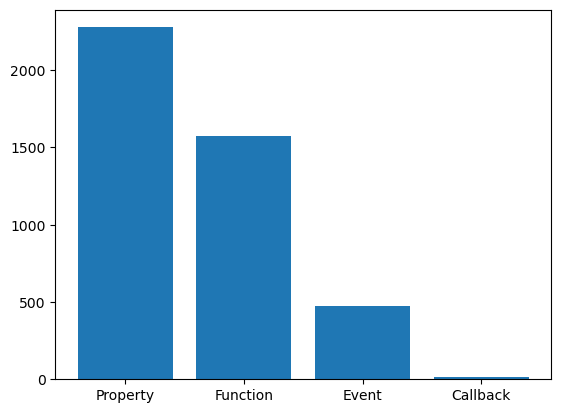

In [235]:
member_type_stats = {member_type: member_type_data_frames[member_type].shape[0] for member_type in member_types}
plt.bar(member_type_stats.keys(), member_type_stats.values())
plt.show()

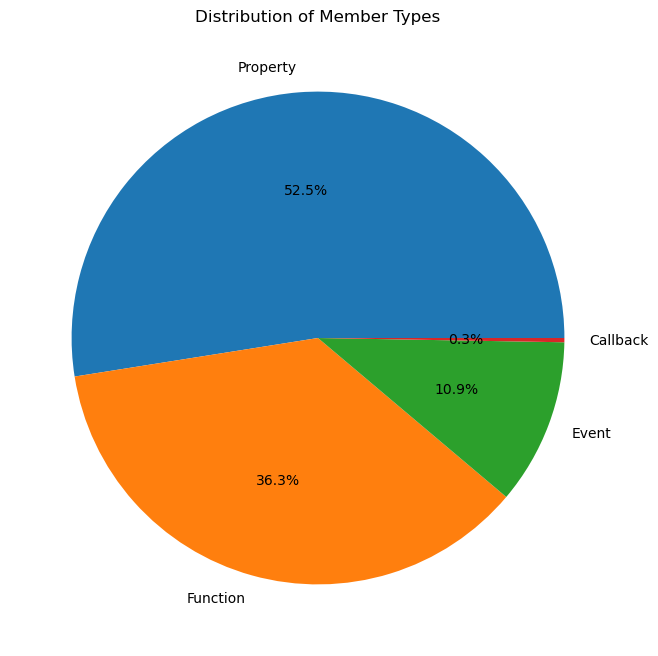

In [236]:
member_type_distribution = api_members['MemberType'].value_counts()
member_type_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Member Types')
plt.ylabel('')
plt.show()

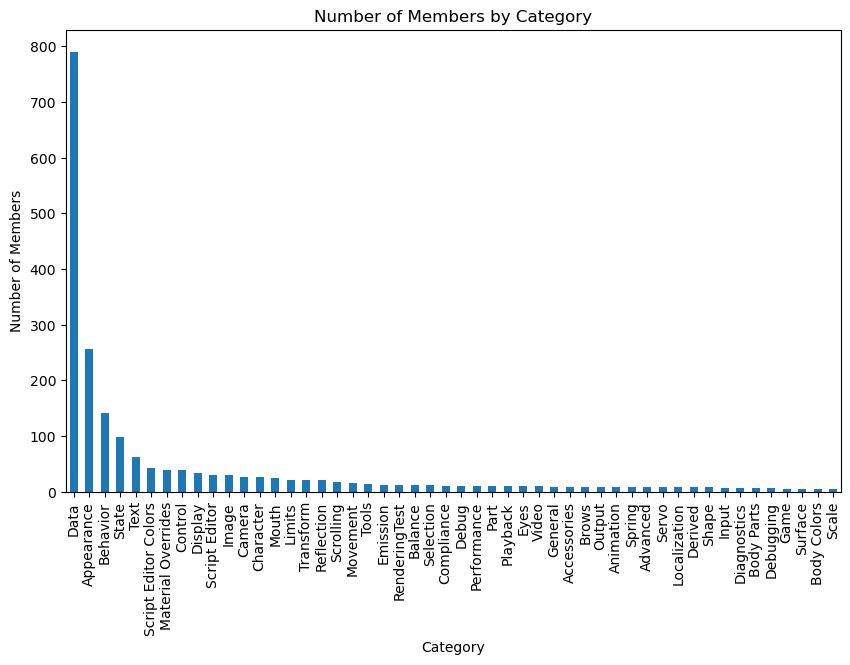

In [237]:
members_by_category = api_members['Category'].value_counts().nlargest(50)
members_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Members by Category')
plt.xlabel('Category')
plt.ylabel('Number of Members')
plt.show()

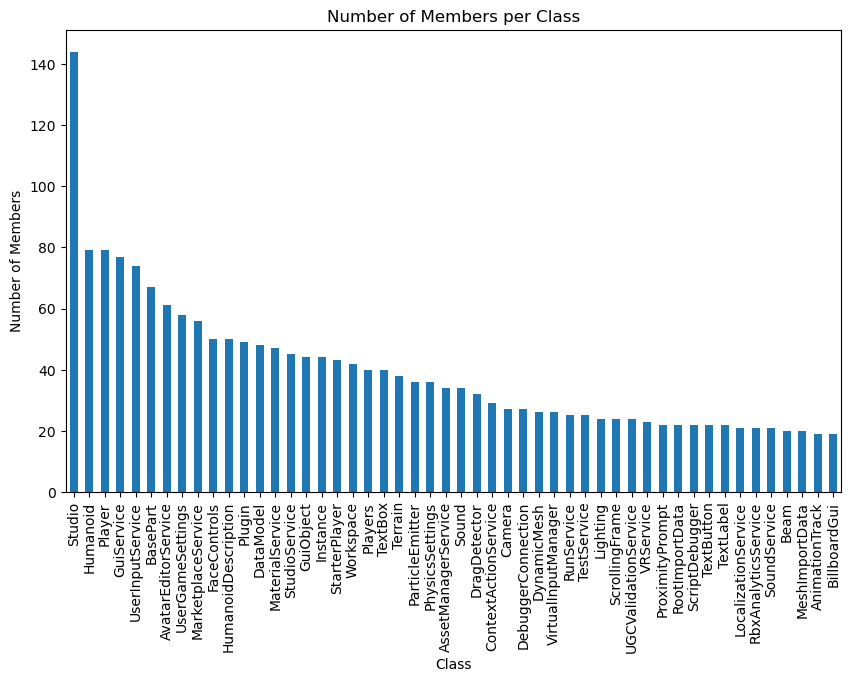

In [238]:
members_per_class = api_members.groupby('InstanceName').size().nlargest(50)
members_per_class.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Members per Class')
plt.xlabel('Class')
plt.ylabel('Number of Members')
plt.show()

In [239]:
class_names = api_classes['Name'].values
class_names

array(['Instance', 'Accoutrement', 'Accessory', 'AdPortal', 'AdService',
       'AdvancedDragger', 'Animation', 'AnimationClip', 'CurveAnimation',
       'KeyframeSequence', 'AnimationClipProvider', 'AnimationController',
       'AnimationFromVideoCreatorService',
       'AnimationFromVideoCreatorStudioService', 'AnimationRigData',
       'AnimationStreamTrack', 'AnimationTrack', 'Animator',
       'AppUpdateService', 'AssetCounterService', 'AssetDeliveryProxy',
       'AssetImportService', 'AssetImportSession', 'AssetManagerService',
       'AssetPatchSettings', 'AssetService', 'Atmosphere', 'Attachment',
       'Bone', 'AudioAnalyzer', 'AudioChorus', 'AudioCompressor',
       'AudioDeviceInput', 'AudioDeviceOutput', 'AudioDistortion',
       'AudioEcho', 'AudioEmitter', 'AudioEqualizer', 'AudioFader',
       'AudioFlanger', 'AudioListener', 'AudioPitchShifter',
       'AudioPlayer', 'AudioReverb', 'AudioSearchParams',
       'AvatarChatService', 'AvatarEditorService', 'AvatarImportSe

In [240]:
creatable_class_names = api_classes[api_classes['Tags'].apply(lambda x: 'NotCreatable' not in x)]['Name'].values
creatable_class_names

array(['Accoutrement', 'Accessory', 'AdPortal', 'AdvancedDragger',
       'Animation', 'CurveAnimation', 'KeyframeSequence',
       'AnimationController', 'AnimationRigData', 'Animator',
       'Atmosphere', 'Attachment', 'Bone', 'AudioAnalyzer', 'AudioChorus',
       'AudioCompressor', 'AudioDeviceInput', 'AudioDeviceOutput',
       'AudioDistortion', 'AudioEcho', 'AudioEmitter', 'AudioEqualizer',
       'AudioFader', 'AudioFlanger', 'AudioListener', 'AudioPitchShifter',
       'AudioPlayer', 'AudioReverb', 'AudioSearchParams', 'Backpack',
       'WrapLayer', 'WrapTarget', 'Beam', 'BindableEvent',
       'BindableFunction', 'Breakpoint', 'BubbleChatMessageProperties',
       'Camera', 'BodyColors', 'CharacterMesh', 'Pants', 'Shirt',
       'ShirtGraphic', 'ClickDetector', 'DragDetector', 'Clouds',
       'Configuration', 'AlignOrientation', 'AlignPosition',
       'AngularVelocity', 'AnimationConstraint', 'BallSocketConstraint',
       'HingeConstraint', 'LineForce', 'LinearVelocity',

In [241]:
luadata.write('output/lua/CreatableClasses.lua', creatable_class_names.tolist())
luadata.write('output/lua/Classes.lua', class_names.tolist())
luadata.write('output/lua/ApiClasses.lua', api_classes.to_dict(orient='records'))

In [242]:
os.makedirs('output/lua/API', exist_ok=True)
for class_name in class_names:
    classData = api_classes[api_classes['Name'] == class_name].to_dict(orient='records')[0]
    luadata.write(f'output/lua/API/{class_name}.lua', classData)

In [243]:
for member_type in member_types:
    luadata.write(f'output/lua/{member_type}.lua', member_type_data_frames[member_type].to_dict(orient='records'))

In [244]:
superclasses = api_classes.set_index('Name')['Superclass'].to_dict()
luadata.write('output/lua/Superclasses.lua', superclasses)